# Practice Pytorch

In [23]:
import torch

def activation(x):
    return 1 / (1 + torch.exp(-x))

torch.manual_seed(7)

# random normal variable of size 1,5
features = torch.randn((1,5))
print("features : ",features , features.shape)

# weights -> random normal variable with the shape of features
weights = torch.randn_like(features)
print("weights : ",weights, weights.shape)

bias = torch.randn(1, 1)
print("bias : ",bias, bias.shape)

features :  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]) torch.Size([1, 5])
weights :  tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]]) torch.Size([1, 5])
bias :  tensor([[0.3177]]) torch.Size([1, 1])


To flip weights we can use: 
    - reshape
    - resize  -> if asked a shape which has more or less elements, it will cut off
    - view * it is preferred!!

In [22]:
mm = torch.mm(features, weights.view(5, 1))
print("weights : ",mm, mm.shape)

mm1 = torch.mm(features, weights.reshape(5, 1))
print("weights : ",mm1, mm1.shape)

#_in place operation
mm2 = torch.mm(features, weights.resize_(5, 1))
print("weights : ",mm2, mm2.shape)

weights :  tensor([[-0.0242]]) torch.Size([1, 1])
weights :  tensor([[-0.0242]]) torch.Size([1, 1])
weights :  tensor([[-0.0242]]) torch.Size([1, 1])


In [25]:
output  = activation(mm + bias)
output 

tensor([[0.5729]])

### converting torch to numpy & vv -> .numpy(), .from_numpy

these are oinplace conversions, changing one will change another!!!

In [29]:
import numpy as np

npvar = np.array([1, 2, 3])
npvar

array([1, 2, 3])

In [31]:
btor = torch.from_numpy(npvar)
btor

tensor([1, 2, 3], dtype=torch.int32)

In [33]:
npvar2 = btor.numpy()
npvar2

array([1, 2, 3])

In [40]:
btor.mul_(2)

tensor([2, 4, 6], dtype=torch.int32)

In [44]:
npvar

array([2, 4, 6])

In [42]:
npvar2

array([2, 4, 6])

# Pytorch - Neural Networks - MNIST

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Make your plots higher resolution

import torch
import numpy as np
import matplotlib.pyplot as plt
import helper


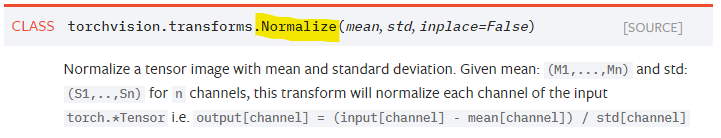

https://pytorch.org/docs/stable/torchvision/transforms.html

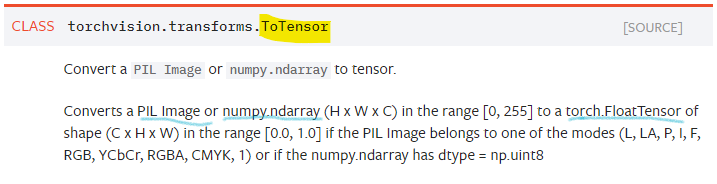

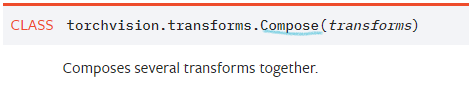 

**DataLoader**  - Combines a dataset and a sampler, and provides an iterable over the given dataset.
https://pytorch.org/docs/stable/data.html?highlight=dataloader#module-torch.utils.data 

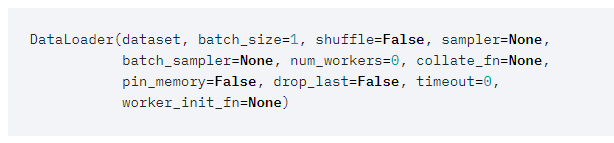


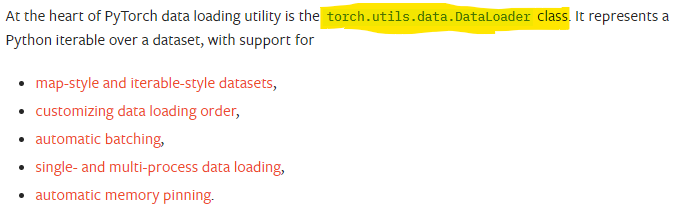

The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. 

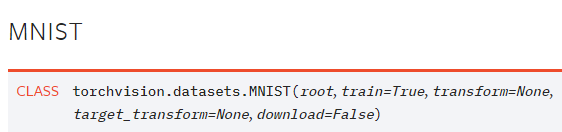

In [13]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),])
print(transform)

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', train=True, download=True, transform =transform)

# Dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


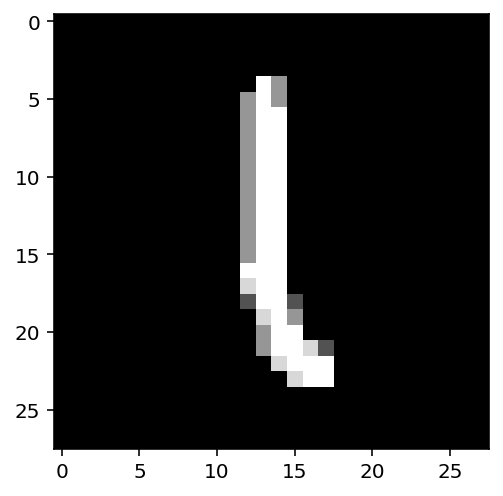

In [15]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [28]:
import torch

def activation(x):
    return 1 / (1 + torch.exp(-x))

# initialization
torch.manual_seed(7)

n_input = images.shape[2] * images.shape[3] # 784
n_hidden = 256
n_output = 10

w1 = torch.randn(n_input, n_hidden)  # 784 x 256
b1 = torch.randn(n_hidden)           #256

w2 = torch.randn(n_hidden, n_output) # 256 x 10
b2 = torch.randn(n_output)           #10

# flatten the input 28 x 28 to vector for all 64 images in a batch
inputs = images.view(images.shape[0], -1)
print("inputs : ",inputs.shape)                 # 64 x 784

h = activation(torch.mm(inputs, w1) + b1)
print("hidden : ",h.shape)   

out = torch.mm(h, w2) + b2
print("output : ",out.shape)   

inputs :  torch.Size([64, 784])
hidden :  torch.Size([64, 256])
output :  torch.Size([64, 10])


In [29]:
print(out)

tensor([[-8.1611e+00, -6.6149e+00, -2.4155e+00, -5.8415e+00, -6.6755e+00,
          6.8908e-01, -1.1670e+01, -8.2019e+00,  1.2003e+00,  6.8222e+00],
        [-6.4676e+00, -1.3445e+01,  4.9161e+00,  9.8253e-01, -6.8007e+00,
          1.5328e+00, -1.7018e+01, -2.4618e+00,  6.2587e-01,  1.8842e+00],
        [ 3.5222e+00, -1.4335e+00, -8.0008e+00, -1.1590e+00, -8.4004e+00,
          4.8453e+00, -1.4267e+00, -5.7248e+00, -5.3532e+00, -1.3988e+01],
        [ 7.7283e+00, -1.8040e+01,  8.8882e+00, -3.6698e+00,  4.2698e+00,
          1.1891e+01, -9.3884e+00, -1.6138e+01,  7.5593e-01, -8.0650e+00],
        [-1.0190e+01, -8.3957e+00, -1.7209e+00,  2.0720e+00, -1.1061e+00,
          4.6184e+00,  3.6410e+00, -1.2868e+01,  1.9768e+00, -1.5570e+01],
        [-7.0552e-01, -5.9007e+00, -4.0994e+00,  3.3434e+00, -7.2285e+00,
          1.1592e+01, -1.0756e+00, -1.5904e+01,  4.9462e+00, -1.5259e+01],
        [ 3.7751e+00, -3.1294e+00,  3.1776e-01,  5.5261e+00, -3.3189e+00,
          1.0839e+01, -1.8803e+0

In [40]:
# def softmax(x):
x = out;
ex = torch.exp(x)  # 64 x 10
print(ex.shape)
ex_sum = torch.sum(ex, 1).view(-1,1) # 64 x 1
print(ex_sum.shape)

sm = ex / ex_sum

def softmax(x):
    ## TODO: Implement the softmax function here
    ex = torch.exp(x)  # 64 x 10
    ex_sum = torch.sum(ex, 1).view(-1,1) # 64 x 1
    return ex / ex_sum

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
torch.Size([64, 1])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
